In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from alpha_vantage.timeseries import TimeSeries
import datetime

In [7]:
ts = TimeSeries(key = 'GKR7N17NQ0AOYH7T', output_format='pandas')

In [8]:
stock_AAPL=pdr.get_data_yahoo('AAPL', datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(60), interval='d')
stock_MSFT=pdr.get_data_yahoo('MSFT',datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(60), interval='d')
stock_F=pdr.get_data_yahoo('F', datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(60), interval='d')
stock_T=pdr.get_data_yahoo('T', datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(60), interval='d')

In [9]:
stock_AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-08,27.547501,27.052500,27.547501,27.375000,247918400.0,25.216373
2015-10-09,28.070000,27.372499,27.500000,28.030001,211064400.0,25.819729
2015-10-12,28.187500,27.860001,28.182501,27.900000,121868800.0,25.699968
2015-10-13,28.112499,27.670000,27.705000,27.947500,132197200.0,25.743731
2015-10-14,27.879999,27.389999,27.822500,27.552500,177849600.0,25.379879
...,...,...,...,...,...,...
2021-01-25,145.089996,136.539993,143.070007,142.919998,157611700.0,142.706757
2021-01-26,144.300003,141.369995,143.600006,143.160004,98390600.0,142.946396
2021-01-27,144.300003,140.410004,143.429993,142.059998,140843800.0,141.848038


In [10]:
df_AAPL = pd.DataFrame(stock_AAPL)
df_MSFT = pd.DataFrame(stock_MSFT)
df_F = pd.DataFrame(stock_F)
df_T = pd.DataFrame(stock_T)

In [11]:
df_T

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-08,33.410000,32.869999,33.110001,33.400002,17305200.0,24.728909
2015-10-09,33.520000,33.000000,33.419998,33.139999,19351300.0,24.536409
2015-10-12,33.310001,33.070000,33.200001,33.299999,14204200.0,24.654873
2015-10-13,33.290001,33.060001,33.189999,33.220001,22148600.0,24.595644
2015-10-14,33.389999,33.099998,33.230000,33.270000,23682900.0,24.632664
...,...,...,...,...,...,...
2021-01-25,29.180000,28.490000,28.760000,29.110001,51913300.0,29.110001
2021-01-26,29.840000,29.070000,29.100000,29.750000,50518900.0,29.750000
2021-01-27,30.200001,28.959999,29.040001,29.139999,73550700.0,29.139999


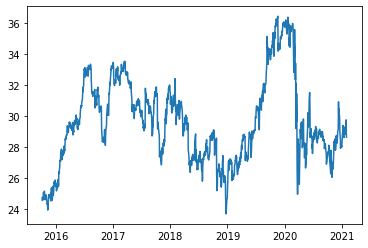

In [12]:
plt.plot(df_T["Adj Close"])

In [13]:
df_Adj_Close = pd.concat([df_MSFT['Adj Close'], df_AAPL['Adj Close'], df_F['Adj Close'],df_T['Adj Close']], axis=1)
df_Adj_Close.columns=['MSFT','AAPL','Ford','AT&T']
df_Adj_Close.head()

,MSFT,AAPL,Ford,AT&T
Date,,,,
2015-10-08,42.910900,25.216373,11.299874,24.728909
2015-10-09,42.603439,25.819729,11.284797,24.536409
2015-10-12,42.503960,25.699968,11.292336,24.654873
2015-10-13,42.404472,25.743731,11.262180,24.595644
2015-10-14,42.214569,25.379879,11.314949,24.632664


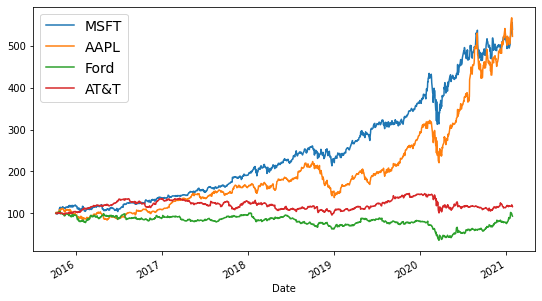

In [14]:
(df_Adj_Close / df_Adj_Close.iloc[0] *100).plot(figsize = (9 , 5));
plt.legend(loc=2, prop={'size': 14})
plt.show()

In [15]:
df_Open = pd.concat([df_MSFT['Open'], df_AAPL['Open'], df_F['Open'],df_T['Open']], axis=1)
df_Close = pd.concat([df_MSFT['Close'], df_AAPL['Close'], df_F['Close'],df_T['Close']], axis=1)
df_High = pd.concat([df_MSFT['High'], df_AAPL['High'], df_F['High'],df_T['High']], axis=1)
df_Low = pd.concat([df_MSFT['Low'], df_AAPL['Low'], df_F['Low'],df_T['Low']], axis=1)
df_Volume = pd.concat([df_MSFT['Volume'], df_AAPL['Volume'], df_F['Volume'],df_T['Volume']], axis=1)
df_Open.columns=['MSFT','AAPL','Ford','AT&T']
df_Close.columns=['MSFT','AAPL','Ford','AT&T']
df_High.columns=['MSFT','AAPL','Ford','AT&T']
df_Low.columns=['MSFT','AAPL','Ford','AT&T']
df_Volume.columns=['MSFT','AAPL','Ford','AT&T']

In [16]:
df_MSFT['Window 40']=df_MSFT['Adj Close'].rolling(window=40).mean()

In [17]:
df_MSFT['Window 252']=df_MSFT['Adj Close'].rolling(window=252).mean()

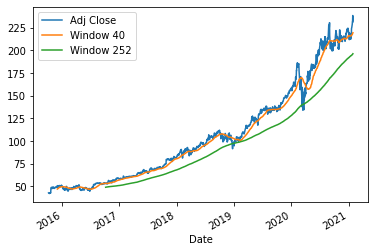

In [18]:
df_MSFT[['Adj Close', 'Window 40', 'Window 252']].plot()
plt.show()

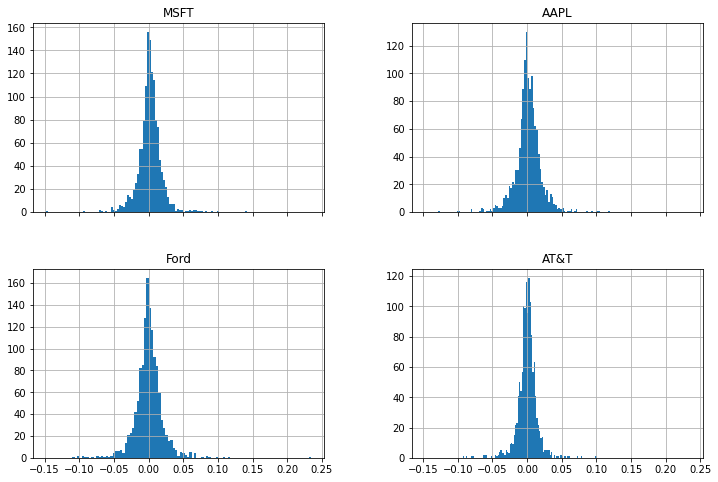

In [19]:
df_daily_pct_change = df_Adj_Close.pct_change()
df_daily_pct_change.hist(bins=100, sharex=True, figsize=(12,8))
plt.show()

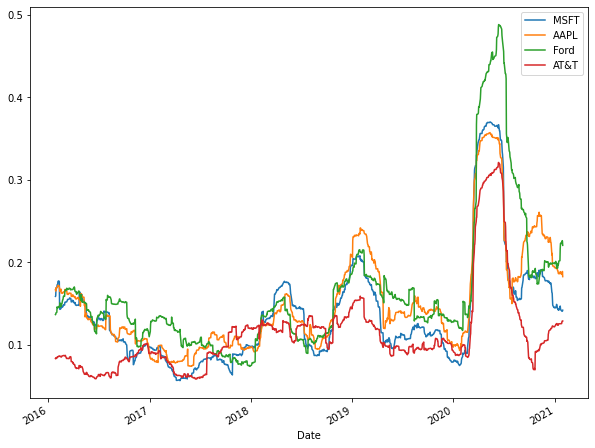

In [20]:
min_periods = 75 
vol = df_daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 
vol.plot(figsize=(10, 8))
plt.show()

In [22]:
import statsmodels.api as sm
df_log_returns=pd.DataFrame()
df_log_returns['MSFT'] = np.log(df_MSFT['Adj Close'] / df_MSFT['Adj Close'].shift(1) )
df_log_returns['AAPL'] = np.log(df_AAPL['Adj Close'] / df_AAPL['Adj Close'].shift(1) )
df_log_returns['F'] = np.log(df_F['Adj Close'] / df_F['Adj Close'].shift(1) )
df_log_returns['T'] = np.log(df_T['Adj Close'] / df_T['Adj Close'].shift(1))
df_log_returns=df_log_returns[1:]
df_log_returns

,MSFT,AAPL,F,T
Date,,,,
2015-10-09,-0.007191,0.023645,-0.001335,-0.007815
2015-10-12,-0.002338,-0.004649,0.000668,0.004816
2015-10-13,-0.002343,0.001701,-0.002674,-0.002405
2015-10-14,-0.004488,-0.014234,0.004675,0.001504
2015-10-15,0.007044,0.014860,0.013894,0.006591
...,...,...,...,...
2021-01-25,0.015720,0.027308,-0.020167,0.006203
2021-01-26,0.012125,0.001678,-0.008897,0.021747
2021-01-27,0.002450,-0.007713,-0.036401,-0.020717


In [24]:
X = sm.add_constant(df_log_returns['AAPL'])
model = sm.OLS(df_log_returns['MSFT'],X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     1333.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          6.80e-203
Time:                        08:31:16   Log-Likelihood:                 3973.7
No. Observations:                1336   AIC:                            -7943.
Df Residuals:                    1334   BIC:                            -7933.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.343      0.1

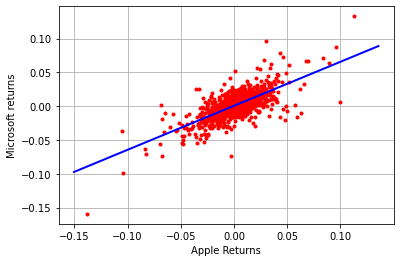

In [25]:
plt.plot(df_log_returns['AAPL'], df_log_returns['MSFT'], 'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')
plt.show()

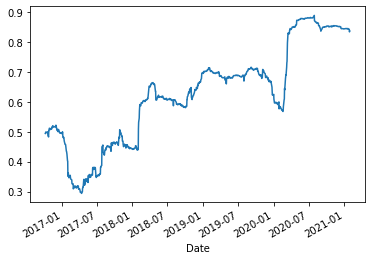

In [26]:
df_log_returns['MSFT'].rolling(window=252).corr(df_log_returns['AAPL']).plot()
plt.show()

In [27]:
def Dual_Moving_Crossover(DF, short_window, long_window):
    signals=DF.copy()
    signals['short_mavg'] = df_AAPL['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
    signals['long_mavg'] = df_AAPL['Close'].rolling(window=long_window, min_periods=1, center=False).mean()
    signals.dropna(inplace=True)
    return signals

In [28]:
DMC_signals = pd.DataFrame()
DMC_signals=(Dual_Moving_Crossover(df_AAPL,40,100))
print(DMC_signals)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2015-10-08   27.547501   27.052500   27.547501   27.375000  247918400.0   
2015-10-09   28.070000   27.372499   27.500000   28.030001  211064400.0   
2015-10-12   28.187500   27.860001   28.182501   27.900000  121868800.0   
2015-10-13   28.112499   27.670000   27.705000   27.947500  132197200.0   
2015-10-14   27.879999   27.389999   27.822500   27.552500  177849600.0   
...                ...         ...         ...         ...          ...   
2021-01-25  145.089996  136.539993  143.070007  142.919998  157611700.0   
2021-01-26  144.300003  141.369995  143.600006  143.160004   98390600.0   
2021-01-27  144.300003  140.410004  143.429993  142.059998  140843800.0   
2021-01-28  141.990005  136.699997  139.520004  137.089996  142621100.0   
2021-01-29  136.740005  130.210007  135.830002  131.960007  177180600.0   

             Adj Close  

In [29]:
DMC_signals.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337 entries, 2015-10-08 to 2021-01-29
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   High        1337 non-null   float64
 1   Low         1337 non-null   float64
 2   Open        1337 non-null   float64
 3   Close       1337 non-null   float64
 4   Volume      1337 non-null   float64
 5   Adj Close   1337 non-null   float64
 6   short_mavg  1337 non-null   float64
 7   long_mavg   1337 non-null   float64
dtypes: float64(8)
memory usage: 94.0 KB


<AxesSubplot:title={'center':'Dual Moving Crossover'}, xlabel='Date'>

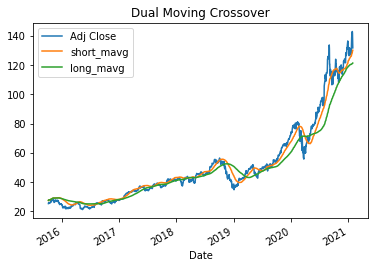

In [30]:
DMC_signals.iloc[:,[5,6,7]].plot(title="Dual Moving Crossover")

<AxesSubplot:title={'center':'Dual Moving Crossover'}, xlabel='Date'>

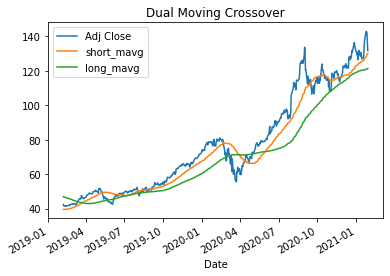

In [31]:
DMC_signals.iloc[-500:,[5,6,7]].plot(title="Dual Moving Crossover")

In [32]:
def MACD(DF,fast_window,slow_window,signal_window):
    df = DF.copy()
    df["MA_Fast"]=df["Adj Close"].ewm(span=fast_window,min_periods=fast_window).mean()
    df["MA_Slow"]=df["Adj Close"].ewm(span=slow_window,min_periods=slow_window).mean()
    df["MACD"]=df["MA_Fast"]-df["MA_Slow"]
    df["Signal"]=df["MACD"].ewm(span=signal_window,min_periods=signal_window).mean()
    df.dropna(inplace=True)
    return df

In [33]:
MACD_signals = pd.DataFrame()
MACD_signals=(MACD(df_AAPL,12,26,9))
print(MACD_signals)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2015-11-24   29.837500   29.280001   29.332500   29.719999  171212800.0   
2015-11-25   29.807501   29.480000   29.802500   29.507500   85553200.0   
2015-11-27   29.602501   29.400000   29.572500   29.452499   52185600.0   
2015-11-30   29.852501   29.437500   29.497499   29.575001  156721200.0   
2015-12-01   29.702499   29.215000   29.687500   29.334999  139409600.0   
...                ...         ...         ...         ...          ...   
2021-01-25  145.089996  136.539993  143.070007  142.919998  157611700.0   
2021-01-26  144.300003  141.369995  143.600006  143.160004   98390600.0   
2021-01-27  144.300003  140.410004  143.429993  142.059998  140843800.0   
2021-01-28  141.990005  136.699997  139.520004  137.089996  142621100.0   
2021-01-29  136.740005  130.210007  135.830002  131.960007  177180600.0   

             Adj Close  

<Figure size 432x288 with 0 Axes>

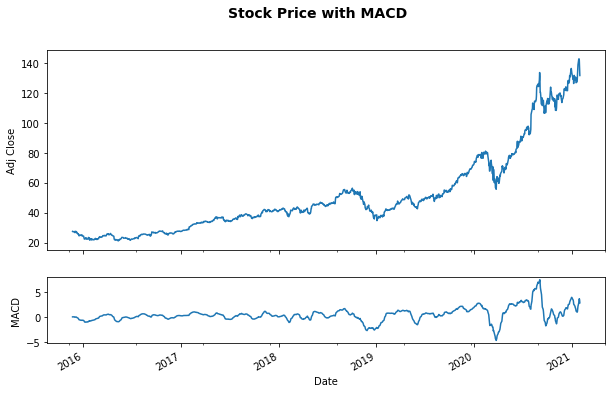

In [34]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[3,1]})
MACD_signals['Adj Close'].plot(ax=ax0)
ax0.set(ylabel='Adj Close')
MACD_signals['MACD'].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='MACD')
fig.suptitle('Stock Price with MACD', fontsize=14, fontweight='bold')
plt.show()

In [35]:
def ATR(DF,n):
    df = DF.copy()
    df['H-L'] = abs(df['High']-df['Low'])
    df['H-PC'] = abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC'] = abs(df['Low']-df['Adj Close'].shift(1))
    df['TR'] = df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    df2.dropna(inplace=True)
    return df2

In [36]:
ATR_signals = pd.DataFrame()
ATR_signals = (ATR(df_AAPL,20))
print(ATR_signals['ATR'])ATR_signals.iloc[:,[-1]].plot(title="ATR")

Date
2015-11-05    2.645418
2015-11-06    2.627090
2015-11-09    2.631435
2015-11-10    2.592459
2015-11-11    2.603112
                ...   
2021-01-25    4.160599
2021-01-26    4.172329
2021-01-27    4.088483
2021-01-28    4.130484
2021-01-29    4.334756
Name: ATR, Length: 1317, dtype: float64


<AxesSubplot:title={'center':'ATR'}, xlabel='Date'>

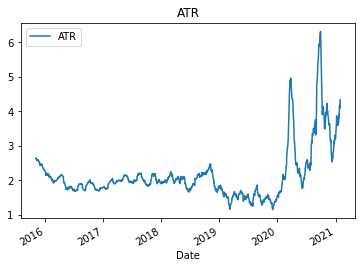

In [37]:
ATR_signals.iloc[:,[-1]].plot(title="ATR")

In [38]:
def BollBnd(DF,n):
    df = DF.copy()
    df["MA"] = df['Adj Close'].rolling(n).mean()
    df["BB_up"] = df["MA"] + 2*df['Adj Close'].rolling(n).std(ddof=0)
    df["BB_dn"] = df["MA"] - 2*df['Adj Close'].rolling(n).std(ddof=0) 
    df["BB_width"] = df["BB_up"] - df["BB_dn"]
    df.dropna(inplace=True)
    return df

In [39]:
BollBnd_signals = pd.DataFrame()
BollBnd_signals=(BollBnd(df_AAPL,20))
print(BollBnd_signals['MA'])

Date
2015-11-04     26.561707
2015-11-05     26.699160
2015-11-06     26.808064
2015-11-09     26.917291
2015-11-10     26.980388
                 ...    
2021-01-25    131.971294
2021-01-26    132.529959
2021-01-27    132.798059
2021-01-28    132.908893
2021-01-29    132.821025
Name: MA, Length: 1318, dtype: float64


<AxesSubplot:title={'center':'Bollinger Band'}, xlabel='Date'>

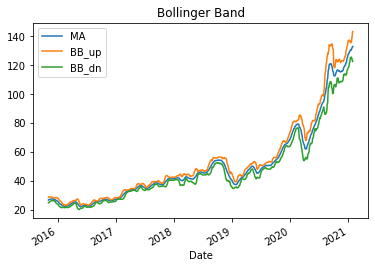

In [40]:
BollBnd_signals.iloc[:,[-4,-3,-2]].plot(title="Bollinger Band")

<AxesSubplot:title={'center':'Bollinger Band'}, xlabel='Date'>

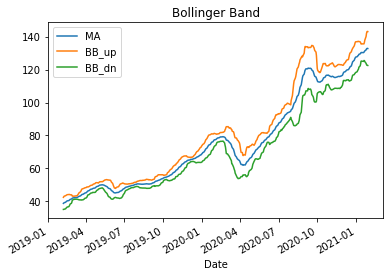

In [41]:
BollBnd_signals.iloc[-500:,[-4,-3,-2]].plot(title="Bollinger Band")

In [42]:
def RSI(DF,n):
    df = DF.copy()
    df['delta']=df['Adj Close'] - df['Adj Close'].shift(1)
    df['gain']=np.where(df['delta']>=0,df['delta'],0)
    df['loss']=np.where(df['delta']<0,abs(df['delta']),0)
    avg_gain = []
    avg_loss = []
    gain = df['gain'].tolist()
    loss = df['loss'].tolist()
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append(((n-1)*avg_gain[i-1] + gain[i])/n)
            avg_loss.append(((n-1)*avg_loss[i-1] + loss[i])/n)
    df['avg_gain']=np.array(avg_gain)
    df['avg_loss']=np.array(avg_loss)
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1+df['RS']))
    df = df.drop(['delta','gain','loss','avg_gain','avg_loss','RS'],axis=1)
    df.dropna(inplace=True)
    return df

In [43]:
RSI_signals = pd.DataFrame()
RSI_signals=(RSI(df_AAPL,14))
print(RSI_signals['RSI'])

Date
2015-10-28    69.785243
2015-10-29    71.359255
2015-10-30    68.230250
2015-11-02    70.502288
2015-11-03    72.269363
                ...    
2021-01-25    69.657010
2021-01-26    69.888908
2021-01-27    67.348310
2021-01-28    57.226194
2021-01-29    49.034207
Name: RSI, Length: 1323, dtype: float64


<Figure size 432x288 with 0 Axes>

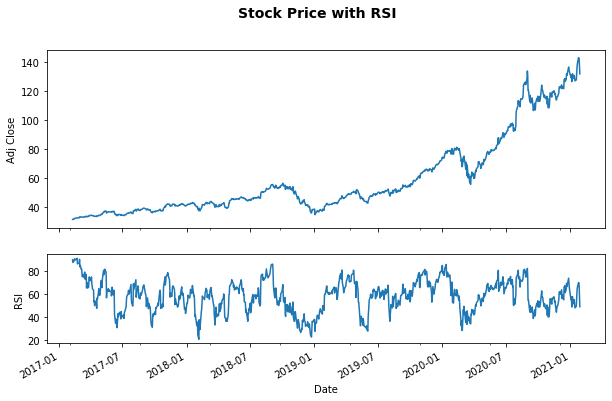

In [44]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2,1]})
RSI_signals.iloc[-1000:,-2].plot(ax=ax0)
ax0.set(ylabel='Adj Close')
RSI_signals.iloc[-1000:,-1].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='RSI')
fig.suptitle('Stock Price with RSI', fontsize=14, fontweight='bold')
plt.show()

In [45]:
def ADX(DF,n):
    df2 = DF.copy()
    df2 = ATR(df2,n)
    df2['DMplus']=np.where((df2['High']-df2['High'].shift(1))>(df2['Low'].shift(1)-df2['Low']),df2['High']-df2['High'].shift(1),0)
    df2['DMplus']=np.where(df2['DMplus']<0,0,df2['DMplus'])
    df2['DMminus']=np.where((df2['Low'].shift(1)-df2['Low'])>(df2['High']-df2['High'].shift(1)),df2['Low'].shift(1)-df2['Low'],0)
    df2['DMminus']=np.where(df2['DMminus']<0,0,df2['DMminus'])
    TRn = []
    DMplusN = []
    DMminusN = []
    TR = df2['TR'].tolist()
    DMplus = df2['DMplus'].tolist()
    DMminus = df2['DMminus'].tolist()
    for i in range(len(df2)):
        if i < n:
            TRn.append(np.NaN)
            DMplusN.append(np.NaN)
            DMminusN.append(np.NaN)
        elif i == n:
            TRn.append(df2['TR'].rolling(n).sum().tolist()[n])
            DMplusN.append(df2['DMplus'].rolling(n).sum().tolist()[n])
            DMminusN.append(df2['DMminus'].rolling(n).sum().tolist()[n])
        elif i > n:
            TRn.append(TRn[i-1] - (TRn[i-1]/n) + TR[i])
            DMplusN.append(DMplusN[i-1] - (DMplusN[i-1]/n) + DMplus[i])
            DMminusN.append(DMminusN[i-1] - (DMminusN[i-1]/n) + DMminus[i])
    df2['TRn'] = np.array(TRn)
    df2['DMplusN'] = np.array(DMplusN)
    df2['DMminusN'] = np.array(DMminusN)
    df2['DIplusN']=100*(df2['DMplusN']/df2['TRn'])
    df2['DIminusN']=100*(df2['DMminusN']/df2['TRn'])
    df2['DIdiff']=abs(df2['DIplusN']-df2['DIminusN'])
    df2['DIsum']=df2['DIplusN']+df2['DIminusN']
    df2['DX']=100*(df2['DIdiff']/df2['DIsum'])
    ADX = []
    DX = df2['DX'].tolist()
    for j in range(len(df2)):
        if j < 2*n-1:
            ADX.append(np.NaN)
        elif j == 2*n-1:
            ADX.append(df2['DX'][j-n+1:j+1].mean())
        elif j > 2*n-1:
            ADX.append(((n-1)*ADX[j-1] + DX[j])/n)
    df2['ADX']=np.array(ADX)
    df2 = df2.drop(['DMplus','DMminus','TRn','DMplusN','DMminusN','DIminusN','DIplusN','DIdiff','DIsum'],axis=1)
    df2.dropna(inplace=True)
    return df2

In [47]:
ADX_signals = pd.DataFrame()
ADX_signals=ADX(df_AAPL,14)
print(ADX_signals)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2015-12-07   29.965000   29.452499   29.745001   29.570000  128336800.0   
2015-12-08   29.650000   29.215000   29.379999   29.557501  137238000.0   
2015-12-09   29.422501   28.770000   29.410000   28.905001  185445600.0   
2015-12-10   29.235001   28.877501   29.010000   29.042500  116850800.0   
2015-12-11   28.847500   28.212500   28.797501   28.295000  187544800.0   
...                ...         ...         ...         ...          ...   
2021-01-25  145.089996  136.539993  143.070007  142.919998  157611700.0   
2021-01-26  144.300003  141.369995  143.600006  143.160004   98390600.0   
2021-01-27  144.300003  140.410004  143.429993  142.059998  140843800.0   
2021-01-28  141.990005  136.699997  139.520004  137.089996  142621100.0   
2021-01-29  136.740005  130.210007  135.830002  131.960007  177180600.0   

             Adj Close  

<Figure size 432x288 with 0 Axes>

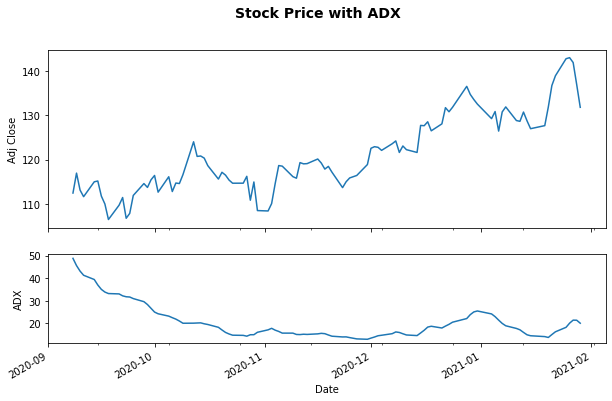

In [48]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2,1]})
ADX_signals.iloc[-100:,-5].plot(ax=ax0)
ax0.set(ylabel='Adj Close')
ADX_signals.iloc[-100:,-1].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='ADX')
fig.suptitle('Stock Price with ADX', fontsize=14, fontweight='bold')
plt.show()

In [49]:
def OBV(DF):
    df = DF.copy()
    df['daily_return'] = df['Adj Close'].pct_change()
    df['direction'] = np.where(df['daily_return']>=0,1,-1)
    df['direction'][0] = 0
    df['vol_adj'] = df['Volume'] * df['direction']
    df['obv'] = df['vol_adj'].cumsum()
    df.dropna(inplace=True)
    return df

In [50]:
OBV_signals = pd.DataFrame()
OBV_signals=OBV(df_AAPL)
print(OBV_signals['obv'].max())

6187407600.0


<ipython-input-49-0b55241e88a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['direction'][0] = 0


In [51]:
def slope(ser,n):
    slopes = [i*0 for i in range(n-1)]
    for i in range(n,len(ser)+1):
        y = ser[i-n:i]
        x = np.array(range(n))
        y_scaled = (y - y.min())/(y.max() - y.min())
        x_scaled = (x - x.min())/(x.max() - x.min())
        x_scaled = sm.add_constant(x_scaled)
        model = sm.OLS(y_scaled,x_scaled)
        results = model.fit()
        slopes.append(results.params[-1])
    slope_angle = (np.rad2deg(np.arctan(np.array(slopes))))
    return np.array(slope_angle)

In [52]:
slope_signal=df_AAPL.copy()
slope_signal['slope']=slope(df_AAPL['Adj Close'],5)
print(slope_signal['slope'],slope_signal['slope'].max(),slope_signal['slope'].min())

Date
2015-10-08     0.000000
2015-10-09     0.000000
2015-10-12     0.000000
2015-10-13     0.000000
2015-10-14     9.448082
                ...    
2021-01-25    44.613941
2021-01-26    45.495023
2021-01-27    42.619963
2021-01-28   -17.621329
2021-01-29   -44.989773
Name: slope, Length: 1337, dtype: float64 50.02525255819524 -49.550038210078554


<Figure size 432x288 with 0 Axes>

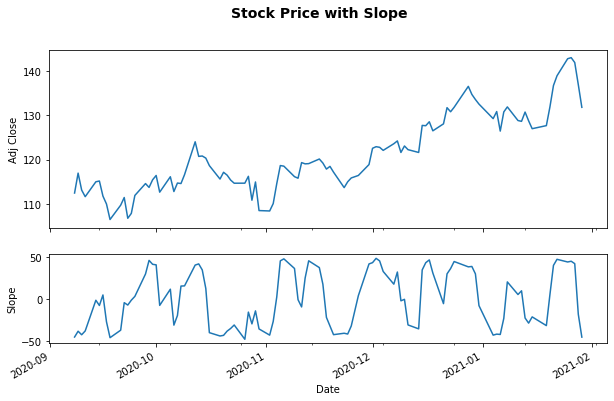

In [53]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2,1]})
slope_signal.iloc[-100:,-2].plot(ax=ax0)
ax0.set(ylabel='Adj Close')
slope_signal.iloc[-100:,-1].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='Slope')
fig.suptitle('Stock Price with Slope', fontsize=14, fontweight='bold')
plt.show()

In [54]:
from stocktrends import Renko

In [56]:
def renko_DF(DF):
    df = DF.copy()
    df.reset_index(inplace=True)
    df = df.iloc[:,[0,1,2,3,5,6]]
    df.rename(columns = {"Date" : "date", "High" : "high","Low" : "low", "Open" : "open","Adj Close" : "close", "Volume" : "volume"}, inplace = True)
    df2 = Renko(df)
    df2.brick_size = round(ATR(DF,120)["ATR"][-1],0)
    renko_df = df2.get_ohlc_data()
    print(renko_df)
    return renko_df

In [57]:
renko_DF(df_AAPL)

C:\Users\Ramakrishnan\anaconda3\envs\projects\lib\site-packages\stocktrends\indicators.py:58: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  self.cdf.loc[0, 1:] = [close - brick_size, close, close - brick_size, close]


         date   open   high    low  close  uptrend
0  2015-10-08   20.0   24.0   20.0   24.0     True
1  2015-11-03   24.0   28.0   24.0   28.0     True
2  2017-02-14   28.0   32.0   28.0   32.0     True
3  2017-05-08   32.0   36.0   32.0   36.0     True
4  2017-10-31   36.0   40.0   36.0   40.0     True
..        ...    ...    ...    ...    ...      ...
60 2020-12-28  132.0  136.0  132.0  136.0     True
61 2021-01-06  132.0  132.0  128.0  128.0    False
62 2021-01-21  132.0  136.0  132.0  136.0     True
63 2021-01-25  136.0  140.0  136.0  140.0     True
64 2021-01-29  136.0  136.0  132.0  132.0    False

[65 rows x 6 columns]


,date,open,high,low,close,uptrend
0,2015-10-08,20.0,24.0,20.0,24.0,True
1,2015-11-03,24.0,28.0,24.0,28.0,True
2,2017-02-14,28.0,32.0,28.0,32.0,True
3,2017-05-08,32.0,36.0,32.0,36.0,True
4,2017-10-31,36.0,40.0,36.0,40.0,True
...,...,...,...,...,...,...
60,2020-12-28,132.0,136.0,132.0,136.0,True
61,2021-01-06,132.0,132.0,128.0,128.0,False
62,2021-01-21,132.0,136.0,132.0,136.0,True
63,2021-01-25,136.0,140.0,136.0,140.0,True


In [58]:
def CAGR(df):
    df2=df.copy()
    days = (df2.index[-1] - df2.index[0]).days
    cagr = ((((df2['Adj Close'][-1]) / df2['Adj Close'][1])) ** (365.0/days)) - 1
    return cagr

In [59]:
print(CAGR(df_AAPL))

0.35886554565573725


In [60]:
def volatility(df):
    df2=df.copy()
    df2['daily returns']=df2['Adj Close'].pct_change()
    vol=df2['daily returns'].std() * np.sqrt(252)
    return vol

In [61]:
print(volatility(df_AAPL))

0.30105388890508766


In [62]:
def sharpe(df,rf):
    sharpe_ratio = (CAGR(df)-rf) / volatility(df)
    return sharpe_ratio

In [65]:
print(sharpe(df_AAPL,0.03))

1.0923809914955713


In [66]:
def sortino(df,rf):
    df2=df.copy()
    df2['daily returns']=df2['Adj Close'].pct_change()
    neg_vol=df2[df2['daily returns']<0]['daily returns'].std() * np.sqrt(252)
    sortino_ratio = (CAGR(df)-rf) /neg_vol
    return sortino_ratio

In [67]:
print(sortino(df_AAPL,0.03))

1.4322486218203039


In [68]:
def max_drawdown(df):
    df2=df.copy()
    df2['daily returns']=df2['Adj Close'].pct_change()
    df2['cum returns']=(1+df2['daily returns']).cumprod()
    df2['cum roll max']= df2['cum returns'].cummax()
    df2['drawdown']=df2['cum roll max']-df2['cum returns']
    df2['drawdown_pct']=df2['drawdown']/df2['cum roll max']
    max_dd=df2['drawdown'].max()
    return max_dd

In [69]:
print(max_drawdown(df_AAPL))

1.0807339008196344


In [70]:
def calmar(df):
    df2=df.copy()
    calmar=CAGR(df2)/max_drawdown(df2)*100
    return calmar

In [71]:
print(calmar(df_AAPL))

33.205726718072945


In [73]:
import requests
from bs4 import BeautifulSoup

In [74]:
tickers=[]
url = 'https://money.cnn.com/data/dow30/'
page = requests.get(url)
page_content = page.content
soup = BeautifulSoup(page_content,'html.parser')
tabl = soup.find_all("table", {"class" : 'wsod_dataTable wsod_dataTableBig'})
for t in tabl:
    rows = t.find_all("td", {"class" : 'wsod_firstCol'})
    for row in rows:
        name=(row.get_text()).split()
        tickers.append(name[0])
print(tickers)

[]


In [105]:
tickers = ['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DOW', 'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'V', 'WMT', 'WBA']

In [107]:
ohlc_mon = {}          
attempt = 0 
drop = [] 
tickers = [j for j in tickers if j not in drop]
for i in tickers:
    print(i)
    try:
        ohlc_mon[i] = pdr.get_data_yahoo(i,datetime.date.today()-datetime.timedelta(2000),datetime.date.today()-datetime.timedelta(60),interval='m')
        ohlc_mon[i].dropna(inplace = True)
    except:
        print(i,"failed to fetch data, retrying")
        continue
tickers = ohlc_mon.keys()

MMM
AXP
AAPL
BA
CAT
CVX
CSCO
KO
DIS
DOW
XOM
GS
HD
IBM
INTC
JNJ
JPM
MCD
MRK
MSFT
NKE
PFE
PG
TRV
UTX
UTX failed to fetch data, retrying
UNH
VZ
V
WMT
WBA


In [108]:
print(tickers)

dict_keys(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DOW', 'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'VZ', 'V', 'WMT', 'WBA'])


In [109]:
import copy
ohlc_dict = copy.deepcopy(ohlc_mon)
return_df = pd.DataFrame()
for ticker in tickers:
    ohlc_dict[ticker]["mon_ret"] = ohlc_dict[ticker]["Adj Close"].pct_change()
    return_df[ticker] = ohlc_dict[ticker]["mon_ret"]
    
print(return_df['AAPL'])

Date
2015-11-01         NaN
2015-12-01   -0.106420
2016-01-01   -0.075242
2016-02-01   -0.006677
2016-03-01    0.133327
                ...   
2020-09-01   -0.100908
2020-10-01   -0.060012
2020-11-01    0.093606
2020-12-01    0.116497
2021-01-01   -0.005502
Name: AAPL, Length: 63, dtype: float64


In [110]:
def pflio(DF,m,x):
    df = DF.copy()
    portfolio = []
    monthly_ret = [0]
    for i in range(1,len(df)):
        if len(portfolio) > 0:
            monthly_ret.append(df[portfolio].iloc[i,:].mean())
            bad_stocks = df[portfolio].iloc[i,:].sort_values(ascending=True)[:x].index.values.tolist()
            portfolio = [t for t in portfolio if t not in bad_stocks]
        fill = m - len(portfolio) 
        new_picks = df[[t for t in tickers if t not in portfolio]].iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist()
        #new_picks = df.iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist()
        portfolio = portfolio + new_picks
        #print(portfolio)
    monthly_ret_df = pd.DataFrame(np.array(monthly_ret),columns=["mon_ret"])
    return monthly_ret_df

In [111]:
def CAGR_monthly(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    n = len(df)/12
    CAGR = (df["cum_return"].tolist()[-1])**(1/n) - 1
    return CAGR

def volatility_monthly(DF):
    df = DF.copy()
    vol = df["mon_ret"].std() * np.sqrt(12)
    return vol

def sharpe_monthly(DF,rf):
    df = DF.copy()
    sharpe = (CAGR_monthly(df) - rf)/volatility_monthly(df)
    return sharpe

def max_dd_monthly(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd

In [112]:
round(CAGR_monthly(pflio(return_df,6,3)),2), round(sharpe_monthly(pflio(return_df,6,3),0.025),2), round(max_dd_monthly(pflio(return_df,6,3)),2)

(0.14, 0.78, 0.21)

In [113]:
DJI = pdr.get_data_yahoo("^DJI",datetime.date.today()-datetime.timedelta(2000),datetime.date.today()-datetime.timedelta(60),interval='m')
DJI["mon_ret"] = DJI["Adj Close"].pct_change()
round(CAGR_monthly(DJI),2), round(sharpe_monthly(DJI,0.025),2), round(max_dd_monthly(DJI),2)

(0.11, 0.52, 0.23)

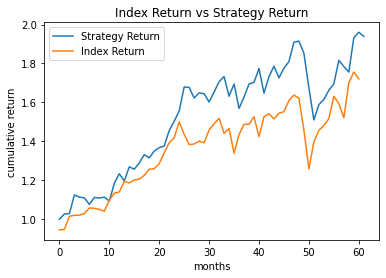

In [114]:
fig, ax = plt.subplots()
plt.plot((1+pflio(return_df,6,3)).cumprod())
plt.plot((1+DJI["mon_ret"][2:].reset_index(drop=True)).cumprod())
plt.title("Index Return vs Strategy Return")
plt.ylabel("cumulative return")
plt.xlabel("months")
ax.legend(["Strategy Return","Index Return"])

In [115]:
short_window=40
long_window=100
DMC_signals = pd.DataFrame()
DMC_signals=(Dual_Moving_Crossover(df_AAPL,short_window,long_window))
DMC_signals['signal']= 0.0
DMC_signals['signal'][short_window:] = np.where(DMC_signals['short_mavg'][short_window:]>DMC_signals['long_mavg'][short_window:], 1.0, 0.0)   
DMC_signals['positions'] = DMC_signals['signal'].diff()
DMC_signals.dropna(inplace=True)
print(DMC_signals)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2015-10-09   28.070000   27.372499   27.500000   28.030001  211064400.0   
2015-10-12   28.187500   27.860001   28.182501   27.900000  121868800.0   
2015-10-13   28.112499   27.670000   27.705000   27.947500  132197200.0   
2015-10-14   27.879999   27.389999   27.822500   27.552500  177849600.0   
2015-10-15   28.025000   27.622499   27.732500   27.965000  150694000.0   
...                ...         ...         ...         ...          ...   
2021-01-25  145.089996  136.539993  143.070007  142.919998  157611700.0   
2021-01-26  144.300003  141.369995  143.600006  143.160004   98390600.0   
2021-01-27  144.300003  140.410004  143.429993  142.059998  140843800.0   
2021-01-28  141.990005  136.699997  139.520004  137.089996  142621100.0   
2021-01-29  136.740005  130.210007  135.830002  131.960007  177180600.0   

             Adj Close  

In [116]:
DMC_signals.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1336 entries, 2015-10-09 to 2021-01-29
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   High        1336 non-null   float64
 1   Low         1336 non-null   float64
 2   Open        1336 non-null   float64
 3   Close       1336 non-null   float64
 4   Volume      1336 non-null   float64
 5   Adj Close   1336 non-null   float64
 6   short_mavg  1336 non-null   float64
 7   long_mavg   1336 non-null   float64
 8   signal      1336 non-null   float64
 9   positions   1336 non-null   float64
dtypes: float64(10)
memory usage: 114.8 KB


In [118]:
count1=0
count2=0
count3=0
for index, row in DMC_signals.iterrows():
    if(row['positions']==0.0):
        count1=count1+1
    elif(row['positions']==1.0):
        count2=count2+1
    else:
        count3=count3+1
print(count1,count2,count3)

1325 6 5


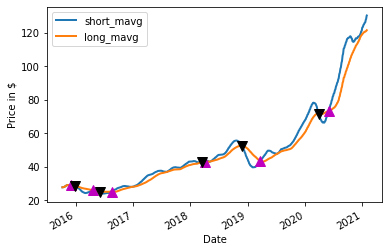

In [119]:
fig = plt.figure()

ax1 = fig.add_subplot(111,  ylabel='Price in $')
DMC_signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(DMC_signals.loc[DMC_signals.positions == 1.0].index, 
         DMC_signals.short_mavg[DMC_signals.positions == 1.0],
         '^', markersize=10, color='m')    
# Plot the sell signals
ax1.plot(DMC_signals.loc[DMC_signals.positions == -1.0].index, 
         DMC_signals.short_mavg[DMC_signals.positions == -1.0],
         'v', markersize=10, color='k')
plt.show()

In [122]:
initial_capital= float(100000.0)
positions = pd.DataFrame()
# Buy a 120 shares
positions['AAPL'] = 120*DMC_signals['signal']   
portfolio = positions.multiply(df_AAPL['Adj Close'], axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(df_AAPL['Adj Close'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(df_AAPL['Adj Close'], axis=0)).sum(axis=1).cumsum()   
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()
portfolio.dropna(inplace=True)
print(portfolio.head())

            AAPL  holdings      cash     total  returns
Date                                                   
2015-10-09   0.0       0.0  100000.0  100000.0      0.0
2015-10-12   0.0       0.0  100000.0  100000.0      0.0
2015-10-13   0.0       0.0  100000.0  100000.0      0.0
2015-10-14   0.0       0.0  100000.0  100000.0      0.0
2015-10-15   0.0       0.0  100000.0  100000.0      0.0


In [123]:
def CAGR_DCM(df):
    df2=df.copy()
    days = (df2.index[-1] - df2.index[0]).days
    cagr = ((((df2['total'][-1]) / df2['total'][1])) ** (365.0/days)) - 1
    return cagr

def volatility_DCM(df):
    df2=df.copy()
    df2['daily returns']=df2['total'].pct_change()
    vol=df2['daily returns'].std() * np.sqrt(252)
    return vol

def sharpe_DCM(df,rf):
    sharpe_ratio = (CAGR_DCM(df)-rf) / volatility_DCM(df)
    return sharpe_ratio
# def max_drawdown_DCM(df):
#     df2=df.copy()
#     df2['daily returns']=df2['Adj Close'].pct_change()
#     df2['cum returns']=(1+df2['daily returns']).cumprod()
#     df2['cum roll max']= df2['cum returns'].cummax()
#     df2['drawdown']=df2['cum roll max']-df2['cum returns']
#     df2['drawdown_pct']=df2['drawdown']/df2['cum roll max']
#     max_dd=df2['drawdown'].max()
#     return max_dd
round(CAGR_DCM(portfolio),2), round(volatility_DCM(portfolio),2) , round(sharpe_DCM(portfolio,0.025),2)

(0.02, 0.02, -0.33)

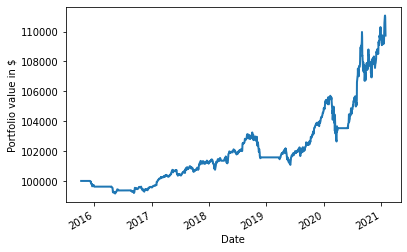

In [124]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
plt.show()

In [146]:
ohlc_intraday = {}          
tickers = ["MSFT","AAPL","FB","AMZN","INTC", "CSCO"]
tickers = [j for j in tickers if j not in drop]
ts = TimeSeries(key = 'GKR7N17NQ0AOYH7T', output_format='pandas')
attempt = 0 # initializing passthrough variable
drop = [] # initializing list to store tickers whose close price was successfully extracted
for i in tickers:
    print(i)
    ohlc_intraday[i] = ts.get_intraday(symbol=i,interval='5min', outputsize='full')[0]
    ohlc_intraday[i].columns = ["Open","High","Low","Adj Close","Volume"]
tickers = ohlc_intraday.keys()

MSFT
AAPL
FB
AMZN
INTC
CSCO


In [149]:
ohlc_intraday['MSFT']

,Open,High,Low,Adj Close,Volume
date,,,,,
2021-03-30 20:00:00,231.8200,231.90,231.78,231.89,2596.0
2021-03-30 19:55:00,231.8999,231.90,231.88,231.90,2040.0
2021-03-30 19:50:00,231.8500,231.85,231.82,231.83,2128.0
2021-03-30 19:40:00,231.8800,231.88,231.69,231.69,2159.0
2021-03-30 19:35:00,231.8600,231.88,231.86,231.88,4501.0
...,...,...,...,...,...
2021-03-02 04:30:00,235.3100,235.31,235.31,235.31,620.0
2021-03-02 04:25:00,235.4600,235.46,235.46,235.46,105.0
2021-03-02 04:15:00,235.3100,235.31,235.31,235.31,225.0


In [150]:
ohlc_dict = copy.deepcopy(ohlc_intraday)
tickers_signal = {}
tickers_ret = {}
for ticker in tickers:
    ohlc_dict[ticker] = ATR(ohlc_dict[ticker],20)
    ohlc_dict[ticker]["roll_max_cp"] = ohlc_dict[ticker]["High"].rolling(20).max()
    ohlc_dict[ticker]["roll_min_cp"] = ohlc_dict[ticker]["Low"].rolling(20).min()
    ohlc_dict[ticker]["roll_max_vol"] = ohlc_dict[ticker]["Volume"].rolling(20).max()
    ohlc_dict[ticker].dropna(inplace=True)
    tickers_signal[ticker] = ""
    tickers_ret[ticker] = []
ohlc_dict['MSFT']

,Open,High,Low,Adj Close,Volume,TR,ATR,roll_max_cp,roll_min_cp,roll_max_vol
date,,,,,,,,,,
2021-03-30 15:40:00,232.040,232.37,231.900,232.000,271069.0,0.470,0.24425,232.50,231.32,2019620.0
2021-03-30 15:35:00,232.030,232.15,231.850,232.050,233465.0,0.300,0.25925,232.50,231.32,2019620.0
2021-03-30 15:30:00,232.145,232.19,231.865,232.020,176687.0,0.325,0.27550,232.50,231.32,2019620.0
2021-03-30 15:25:00,231.990,232.18,231.900,232.170,199558.0,0.280,0.28500,232.50,231.32,2019620.0
2021-03-30 15:20:00,232.160,232.24,231.980,231.996,197238.0,0.260,0.29250,232.50,231.32,2019620.0
...,...,...,...,...,...,...,...,...,...,...
2021-03-02 04:30:00,235.310,235.31,235.310,235.310,620.0,0.570,0.26950,236.87,235.31,5446.0
2021-03-02 04:25:00,235.460,235.46,235.460,235.460,105.0,0.150,0.25350,236.47,235.31,4949.0
2021-03-02 04:15:00,235.310,235.31,235.310,235.310,225.0,0.150,0.22000,236.47,235.31,4949.0


In [151]:
for ticker in tickers:
    for i in range(len(ohlc_dict[ticker])):
        if tickers_signal[ticker] == "":
            tickers_ret[ticker].append(0)
            if ohlc_dict[ticker]["High"][i]>=ohlc_dict[ticker]["roll_max_cp"][i] and \
               ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Buy"
            elif ohlc_dict[ticker]["Low"][i]<=ohlc_dict[ticker]["roll_min_cp"][i] and \
               ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Sell"
        
        elif tickers_signal[ticker] == "Buy":
            if ohlc_dict[ticker]["Adj Close"][i]<ohlc_dict[ticker]["Adj Close"][i-1] - ohlc_dict[ticker]["ATR"][i-1]:
                tickers_signal[ticker] = ""
                tickers_ret[ticker].append(((ohlc_dict[ticker]["Adj Close"][i-1] - ohlc_dict[ticker]["ATR"][i-1])/ohlc_dict[ticker]["Adj Close"][i-1])-1)
            elif ohlc_dict[ticker]["Low"][i]<=ohlc_dict[ticker]["roll_min_cp"][i] and \
               ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Sell"
                tickers_ret[ticker].append(((ohlc_dict[ticker]["Adj Close"][i-1] - ohlc_dict[ticker]["ATR"][i-1])/ohlc_dict[ticker]["Adj Close"][i-1])-1)
            else:
                tickers_ret[ticker].append((ohlc_dict[ticker]["Adj Close"][i]/ohlc_dict[ticker]["Adj Close"][i-1])-1)
                
        elif tickers_signal[ticker] == "Sell":
            if ohlc_dict[ticker]["Adj Close"][i]>ohlc_dict[ticker]["Adj Close"][i-1] + ohlc_dict[ticker]["ATR"][i-1]:
                tickers_signal[ticker] = ""
                tickers_ret[ticker].append((ohlc_dict[ticker]["Adj Close"][i-1]/(ohlc_dict[ticker]["Adj Close"][i-1] + ohlc_dict[ticker]["ATR"][i-1]))-1)
            elif ohlc_dict[ticker]["High"][i]>=ohlc_dict[ticker]["roll_max_cp"][i] and \
               ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Buy"
                tickers_ret[ticker].append((ohlc_dict[ticker]["Adj Close"][i-1]/(ohlc_dict[ticker]["Adj Close"][i-1] + ohlc_dict[ticker]["ATR"][i-1]))-1)
            else:
                tickers_ret[ticker].append((ohlc_dict[ticker]["Adj Close"][i-1]/ohlc_dict[ticker]["Adj Close"][i])-1)
                
    ohlc_dict[ticker]["ret"] = np.array(tickers_ret[ticker])

In [152]:
def CAGR_RB(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["ret"]).cumprod()
    n = len(df)/(252*78)
    CAGR = (df["cum_return"].tolist()[-1])**(1/n) - 1
    return CAGR

def volatility_RB(DF):
    df = DF.copy()
    vol = df["ret"].std() * np.sqrt(252*78)
    return vol

def sharpe_RB(DF,rf):
    df = DF.copy()
    sharpe = (CAGR_RB(df) - rf)/volatility_RB(df)
    return sharpe
    

def max_dd_RB(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd


strategy_df = pd.DataFrame()
for ticker in tickers:
    strategy_df[ticker] = ohlc_dict[ticker]["ret"]
strategy_df["ret"] = strategy_df.mean(axis=1)
round(CAGR_RB(strategy_df),2), round(sharpe_RB(strategy_df,0.025),2), round(max_dd_RB(strategy_df),2)

(0.42, 7.58, 0.02)

<AxesSubplot:xlabel='date'>

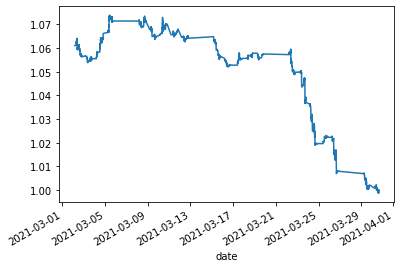

In [153]:
(1+strategy_df["ret"]).cumprod().plot()

In [155]:
data=pdr.get_data_yahoo('AAPL', datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(60), interval='d')

In [158]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-09,28.070000,27.372499,27.500000,28.030001,211064400.0,25.819729
2015-10-12,28.187500,27.860001,28.182501,27.900000,121868800.0,25.699968
2015-10-13,28.112499,27.670000,27.705000,27.947500,132197200.0,25.743731
2015-10-14,27.879999,27.389999,27.822500,27.552500,177849600.0,25.379879
2015-10-15,28.025000,27.622499,27.732500,27.965000,150694000.0,25.759848
...,...,...,...,...,...,...
2021-01-25,145.089996,136.539993,143.070007,142.919998,157611700.0,142.706757
2021-01-26,144.300003,141.369995,143.600006,143.160004,98390600.0,142.946396
2021-01-27,144.300003,140.410004,143.429993,142.059998,140843800.0,141.848038


In [159]:
adv20 = data.rolling(20).Volume.mean().reset_index(0, drop=True)

In [160]:
data = data.assign(adv20=adv20)

In [ ]:
ohlcv = ['open', 'high', 'low', 'close', 'volume']

In [165]:
data = data.join(data.rank(axis=1, pct=True), rsuffix='_rank')

In [168]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1336 entries, 2015-10-09 to 2021-01-29
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   High            1336 non-null   float64
 1   Low             1336 non-null   float64
 2   Open            1336 non-null   float64
 3   Close           1336 non-null   float64
 4   Volume          1336 non-null   float64
 5   Adj Close       1336 non-null   float64
 6   adv20           0 non-null      float64
 7   High_rank       1336 non-null   float64
 8   Low_rank        1336 non-null   float64
 9   Open_rank       1336 non-null   float64
 10  Close_rank      1336 non-null   float64
 11  Volume_rank     1336 non-null   float64
 12  Adj Close_rank  1336 non-null   float64
 13  adv20_rank      0 non-null      float64
dtypes: float64(14)
memory usage: 188.9 KB


<ipython-input-168-2021d7df9464>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(null_counts=True)
